<a href="https://colab.research.google.com/github/FZgabor/ML2025/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Házi feladat

https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/spam.csv

Készítsen a spam.csv segítségével spam detektort! A modell NaiveBayes alapú legyen, CountVectorizer segítségével alakítsa át szöveget. Pipeline és Gridsearch segítségével végezzen hiperparaméter hangolást! Hiper paraméterek: CountVectorizer esetén: ngram_range, analyzer, MultinomialNB esetén: alpha, fit_prior! A modellt classification_report segítségével értékelje! Készítsen hozzá zavartsági (confusion) mátrixot is! Beküldési határidő: 2025.11.24!

In [2]:
!wget https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/spam.csv

--2025-12-22 04:21:08--  https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2025-12-22 04:21:08 (12.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Adat betöltése ---
df = pd.read_csv("spam.csv", encoding="latin1")

# Eltávolítjuk az Unnamed oszlopokat
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Az oszlopokat átnevezzük
df.columns = ["label", "text"]

# Ellenőrizzük, hogy nem hiányzik-e nulla
df = df.dropna()
print(df.shape)
print(df["label"].value_counts())


(5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64


In [4]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("nb", MultinomialNB())
])

param_grid = {
    # CountVectorizer:
    "vect__ngram_range": [(1,1), (1,2)],
    "vect__analyzer": ["word", "char"],
    # Naive Bayes:
    "nb__alpha": [0.1, 0.5, 1.0],
    "nb__fit_prior": [True, False],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Legjobb paraméterek:", grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Legjobb paraméterek: {'nb__alpha': 0.5, 'nb__fit_prior': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}


Classification Report:

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



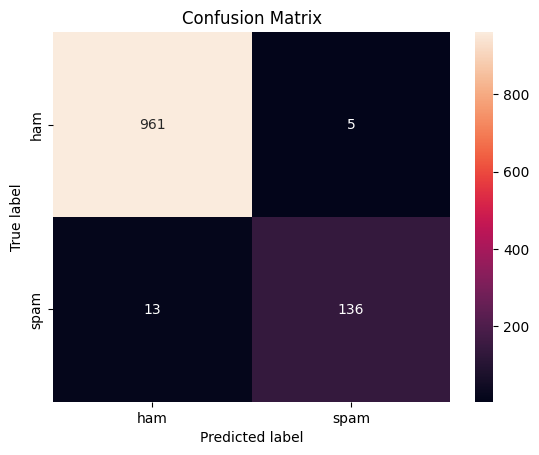

In [6]:
y_pred = grid.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=grid.classes_,
            yticklabels=grid.classes_)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix")
plt.show()
